<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Semanal Nº8
#### Nicolás Salvia


# TS8: Estimación espectral. Método de Welch

En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App. y el 8 de Hayes.
Para ello, realizaremos el punto 4 del TP3.

4) Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado. 

Para una señal
$$
    x(k) =a1⋅sen(Ω1⋅k) + n(k)
$$
siendo
$$
    Ω1=Ω0+fr⋅ \frac {2π} {N}
$$
$$
    Ω0= \frac {π}{2}
$$
y las variables aleatorias definidas por 
$$
    fr∼U(−2,2)
$$
$$
    n∼N(0, σ²)
$$
Evalue el siguiente estimador Ω1
$$
    \hat{Ω}^{W}_{1} = arg_{f}max\{\hat{Pw}\}
$$
Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del piso de ruido impuesto por n(k).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as scpySig
import spectrum as sp

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
# Inicializamos las variables
m = 200
N = 1000   
fs = 1000 # Hz
ts = 1/fs
mean = 0  # Media
a1 = 1
SNR = np.array([3, 10])
noise_p = a1/(10**(SNR/10))
tt = np.linspace(0, (N-1), N) * ts 
sesgo_3db = []
media_3db = []
varianza_3db = []
sesgo_10db = []
media_10db = []
varianza_10db = []

fr = np.random.uniform(low = -1/2, high= 1/2, size = m)
noise_3db = np.random.normal(mean, noise_p[0], size=(N, m))
noise_10db = np.random.normal(mean, noise_p[1], size=(N, m))

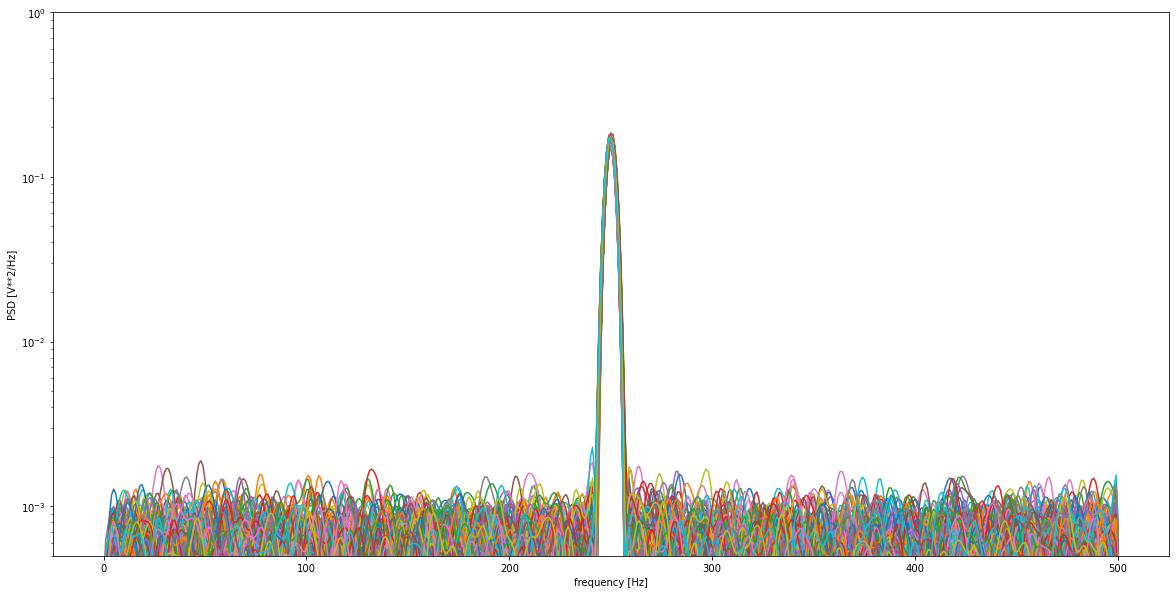

In [3]:
### Ejemplo para 3db ###
freq_1 = ((np.pi/2)*fs)/(2*np.pi)
freq_2 = ((np.pi/2) + (fr * ((2*np.pi)/N)))*fs/(2*np.pi)
freq_real = np.mean(freq_2, dtype="float64")
a_sign = np.sqrt(a1*2)

signal_welch_3db = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2)) + noise_3db
ff, periodgram_welch_3db = scpySig.welch(signal_welch_3db, fs, window='hann', axis=0, nfft = N)

plt.semilogy(ff, periodgram_welch_3db)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [4]:
# Calculo el sesgo y la varianza
peaks_welch_3db = np.argmax(periodgram_welch_3db, axis = 0)
mean_welch_3db = np.mean(peaks_welch_3db, dtype="float64")
sesgo_welch_3db = mean_welch_3db - freq_real
var_welch_3db = np.var(peaks_welch_3db, dtype="float64")

sesgo_3db.append(sesgo_welch_3db)
media_3db.append(mean_welch_3db)
varianza_3db.append(var_welch_3db)

In [ ]:
### Ejemplo para 10db ###
signal_welch_10db = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2)) + noise_10db
ff, periodgram_welch_10db = scpySig.welch(signal_welch_10db, fs, window='hann', axis=0, nfft = N)

plt.semilogy(ff, periodgram_welch_10db)
plt.ylim([0.5e-5, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
# Calculo el sesgo y la varianza
peaks_welch_10db = np.argmax(periodgram_welch_10db, axis = 0)
mean_welch_10db = np.mean(peaks_welch_10db, dtype="float64")
sesgo_welch_10db = mean_welch_10db - freq_real
var_welch_10db = np.var(peaks_welch_10db, dtype="float64")

sesgo_10db.append(sesgo_welch_10db)
media_10db.append(mean_welch_10db)
varianza_10db.append(var_welch_10db)

In [ ]:
# Realizamos los mismos experimentos con un periodograma normal
### Ejemplo para 3 db ###
signal_periodgram_3db = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2)) + noise_3db
psd_periodgram_3db = []
psd_periodgram_peaks_3db = []

for k in range (m):
    psd_periodgram_3db.append(sp.speriodogram(signal_periodgram_3db[:,k], NFFT = N))
    psd_periodgram_3db[k] = psd_periodgram_3db[k][0:int(N/2+1)]
    plt.semilogy(ff[0:int(N/2+1)], psd_periodgram_3db[k][0:int(N/2+1)])
    psd_periodgram_peaks_3db.append(np.argmax(psd_periodgram_3db[k]))


plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
# Calculo el sesgo y la varianza
mean_periodgram_3db = np.mean(psd_periodgram_peaks_3db, dtype="float64")
sesgo_periodgram_3db = mean_periodgram_3db - freq_real
var_periodgram_3db = np.var(psd_periodgram_peaks_3db, dtype="float64")

sesgo_3db.append(sesgo_periodgram_3db)
media_3db.append(mean_periodgram_3db)
varianza_3db.append(var_periodgram_3db)

In [ ]:
### Ejemplo para 10 db ###
signal_periodgram_10db = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2)) + noise_10db
psd_periodgram_10db = []
psd_periodgram_peaks_10db = []

for k in range (m):
    psd_periodgram_10db.append(sp.speriodogram(signal_periodgram_10db[:,k], NFFT = N))
    psd_periodgram_10db[k] = psd_periodgram_10db[k][0:int(N/2+1)]
    plt.semilogy(ff[0:int(N/2+1)], psd_periodgram_10db[k][0:int(N/2+1)])
    psd_periodgram_peaks_10db.append(np.argmax(psd_periodgram_10db[k]))

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
# Calculo el sesgo y la varianza
mean_periodgram_10db = np.mean(psd_periodgram_peaks_10db, dtype="float64")
sesgo_periodgram_10db = mean_periodgram_10db - freq_real
var_periodgram_10db = np.var(psd_periodgram_peaks_10db, dtype="float64")

sesgo_10db.append(sesgo_periodgram_10db)
media_10db.append(mean_periodgram_10db)
varianza_10db.append(var_periodgram_10db)

In [ ]:
### Realizamos los mismos experimentos utilizando el estimador blackman-tukey ###
### Para 3db ###
psd_blackmanTukey_3db = []
psd_blackmanTukey_peaks_3db = []
signal_blackmanTukey_3db = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2)) + noise_3db

for k in range (m):
    psd_blackmanTukey_3db.append(sp.CORRELOGRAMPSD(signal_blackmanTukey_3db[:,k], lag=15, NFFT = N))
    psd_blackmanTukey_3db[k] = psd_blackmanTukey_3db[k][0:int(N/2+1)]
    plt.semilogy(ff[0:int(N/2+1)], psd_blackmanTukey_3db[k][0:int(N/2+1)])
    psd_blackmanTukey_peaks_3db.append(np.argmax(psd_blackmanTukey_3db[k]))
    
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
# Calculo el sesgo y la varianza
mean_blackmanTukey_3db = np.mean(psd_blackmanTukey_peaks_3db, dtype="float64")
sesgo_blackmanTukey_3db = mean_blackmanTukey_3db - freq_real
var_blackmanTukey_3db = np.var(psd_blackmanTukey_peaks_3db, dtype="float64")

sesgo_3db.append(sesgo_blackmanTukey_3db)
media_3db.append(mean_blackmanTukey_3db)
varianza_3db.append(var_blackmanTukey_3db)

In [ ]:
### Para 10db ###
psd_blackmanTukey_10db = []
psd_blackmanTukey_peaks_10db = []
signal_blackmanTukey_10db = a_sign * np.sin(2*np.pi * np.outer(tt, freq_2)) + noise_10db

for k in range (m):
    psd_blackmanTukey_10db.append(sp.CORRELOGRAMPSD(signal_blackmanTukey_10db[:,k], lag=15, NFFT = N))
    psd_blackmanTukey_10db[k] = psd_blackmanTukey_10db[k][0:int(N/2+1)]
    plt.semilogy(ff[0:int(N/2+1)], psd_blackmanTukey_10db[k][0:int(N/2+1)])    
    psd_blackmanTukey_peaks_10db.append(np.argmax(psd_blackmanTukey_10db[k][0:int(N/2+1)]))
    
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
# Calculo el sesgo y la varianza
mean_blackmanTukey_10db = np.mean(psd_blackmanTukey_peaks_10db, dtype="float64")
sesgo_blackmanTukey_10db = mean_blackmanTukey_10db - freq_real
var_blackmanTukey_10db = np.var(psd_blackmanTukey_peaks_10db, dtype="float64")

sesgo_10db.append(sesgo_blackmanTukey_10db)
media_10db.append(mean_blackmanTukey_10db)
varianza_10db.append(var_blackmanTukey_10db)

In [ ]:
### Construimos la tabla para 3db ###
data_3db = [['Periodograma', media_3db[0],sesgo_3db[0], varianza_3db[0]], 
            ['Welch', media_3db[1],sesgo_3db[1], varianza_3db[1]], 
            ['Blackman-Tukey', media_3db[2],sesgo_3db[2], varianza_3db[2]]]
df = pd.DataFrame(data_3db, columns = ['Método', 'Media', 'Sesgo', 'Varianza'])
df

In [ ]:
### Construimos la tabla para 10db ###
data_10db = [['Periodograma', media_10db[0],sesgo_10db[0], varianza_10db[0]], 
            ['Welch', media_10db[1],sesgo_10db[1], varianza_10db[1]], 
            ['Blackman-Tukey', media_10db[2],sesgo_10db[2], varianza_10db[2]]]
df = pd.DataFrame(data_10db, columns = ['Método', 'Media', 'Sesgo', 'Varianza'])
df

Comparando los distintos tipos de datos obtenidos, podemos verificar los distintos tipos de Varianza y Sesgo al utilizar distintos métodos.